In [18]:
%load_ext autoreload
%autoreload 2

import importlib
import numpy as np
import pandas as pd
import datetime

np.set_printoptions(suppress=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from stocks import Stocks
from agents.agent import Agent
from utils import *
from visualizations import *

tickers = ['MSFT', 'GE', 'AXP', 'AON']

In [22]:
def plot_results(episode, mode):
    # Open the log file
    positions, rewards, returns, q_values = Agent.load_logs(episode, mode)
    
    start = '2000-1-1' if mode == 'training' else '2005-1-1'
    end   = '2004-12-31' if mode == 'training' else '2019-09-30'
    
    # Get the baseline stocks
    baseline = Stocks([*tickers, 'SPY'], start=start, end=end)
    
    # Plot cumulative rewards
    plot_cumulative_returns(pd.concat([simple_returns(baseline.prices), returns], 1))
    
    # Plot q values
    plot(q_values)
    
    # Drawdown plot
    plot_drawdown(returns)
    
    # Drawdown of the S&P index
    plot_drawdown(simple_returns(baseline.prices['SPY']), title='Drawdown of S&P 500')
    
    # Position percentages
    plot_positions(positions)
    
    return show_sharpe_ratio(pd.concat([simple_returns(baseline.prices), returns], 1))

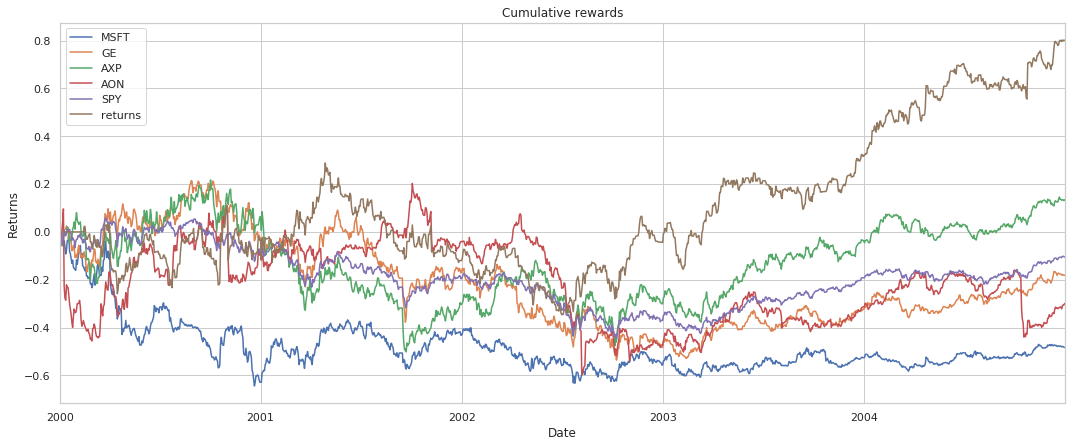

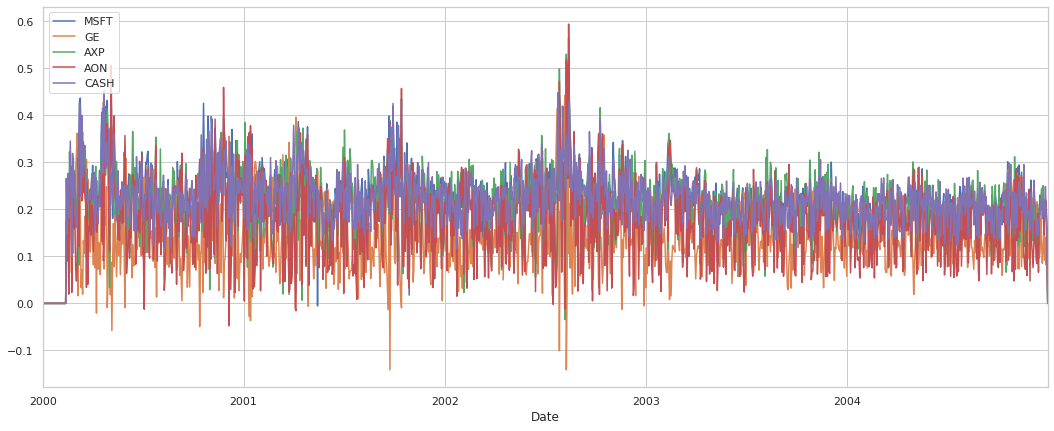

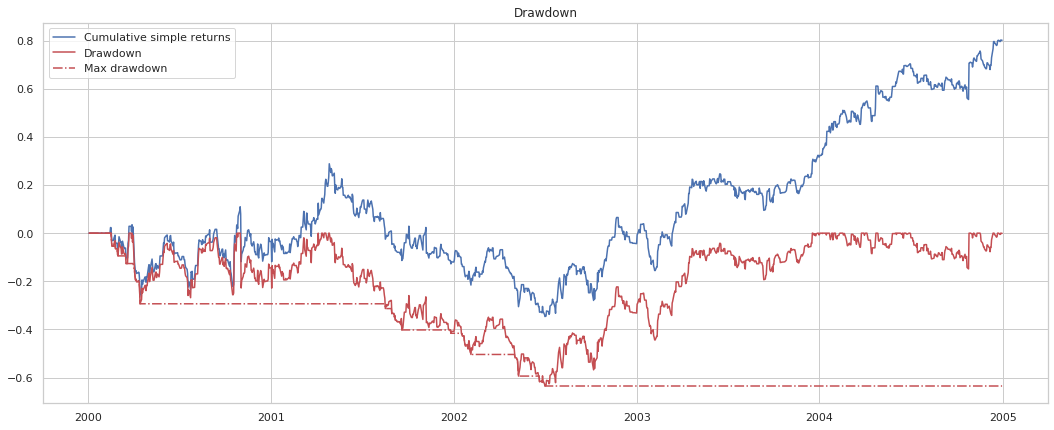

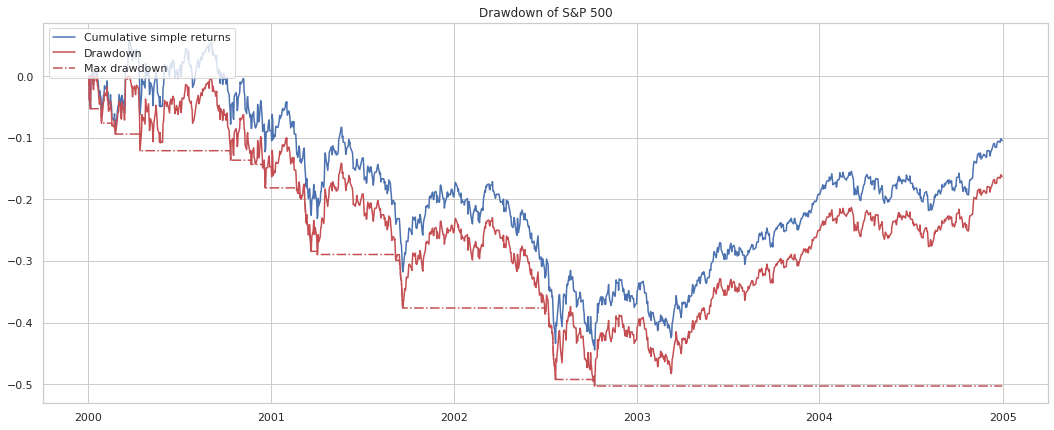

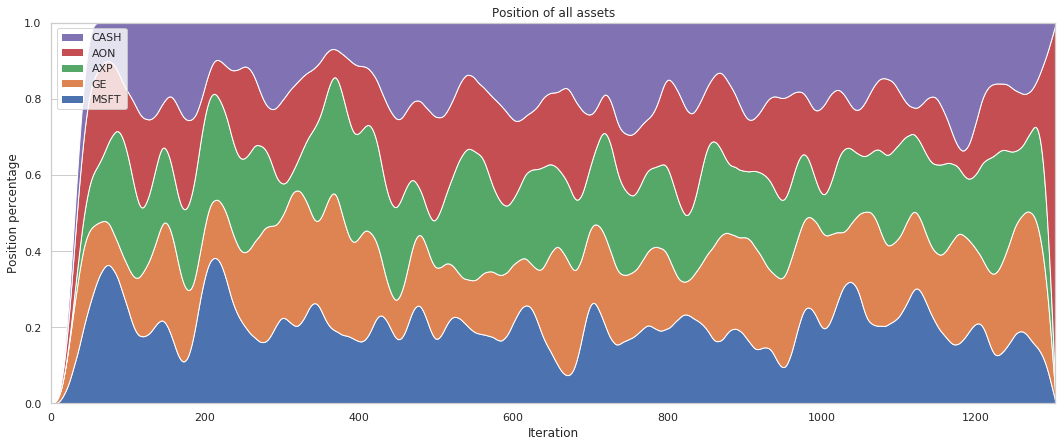

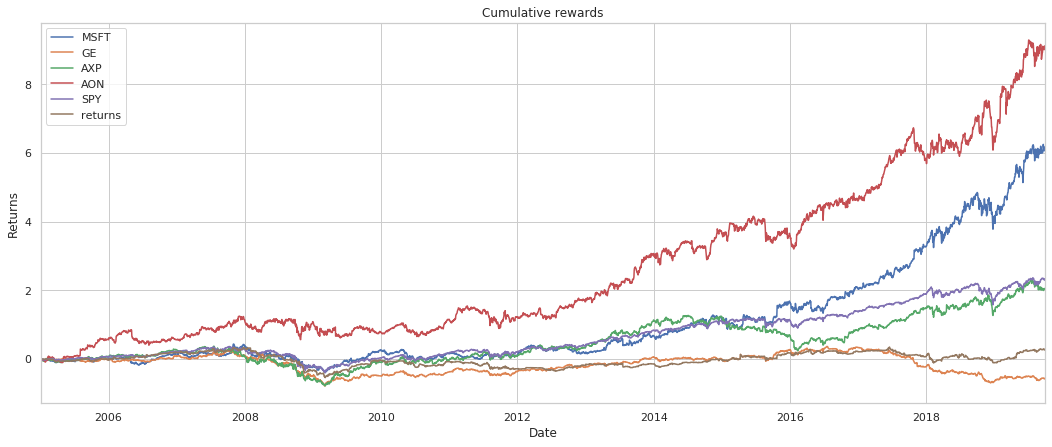

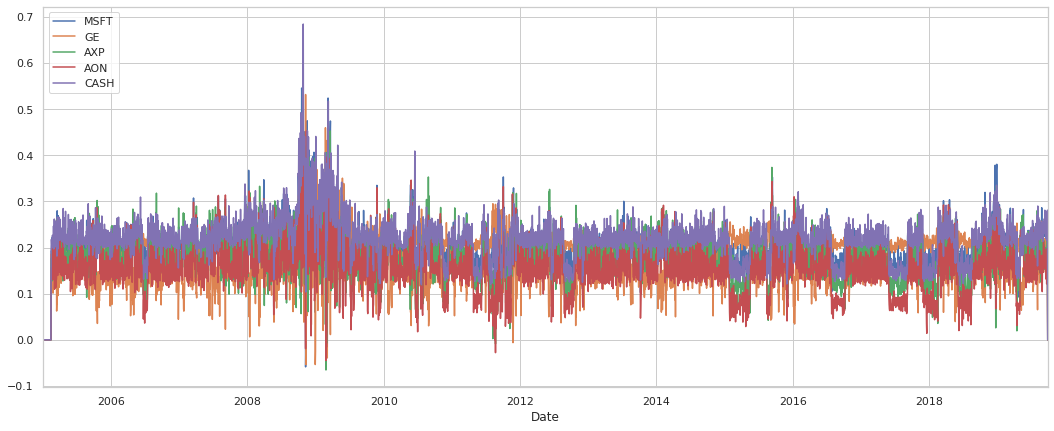

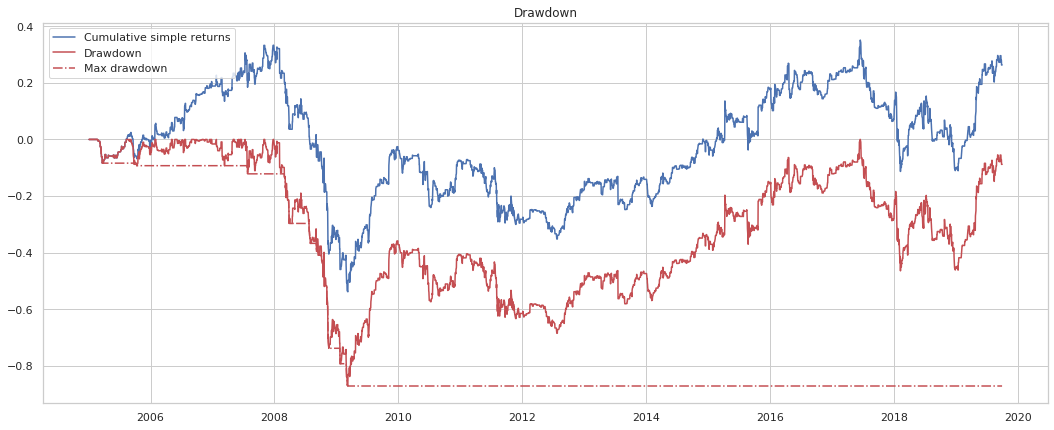

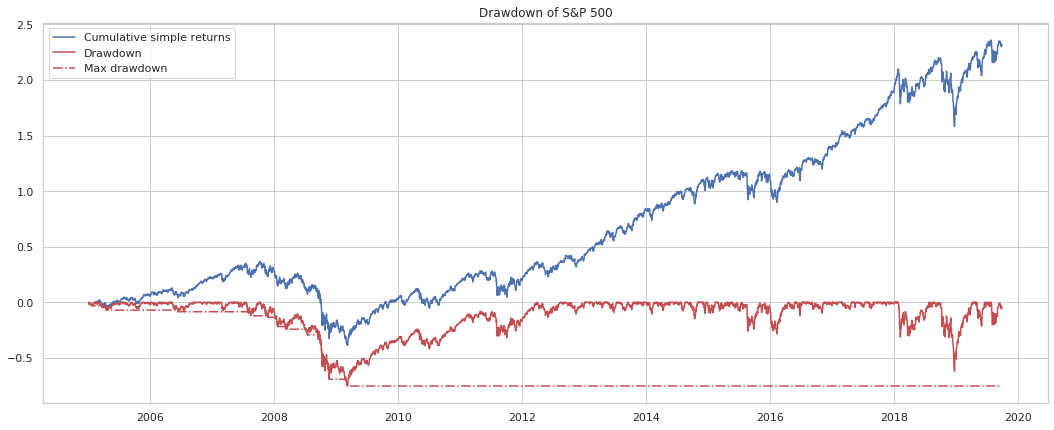

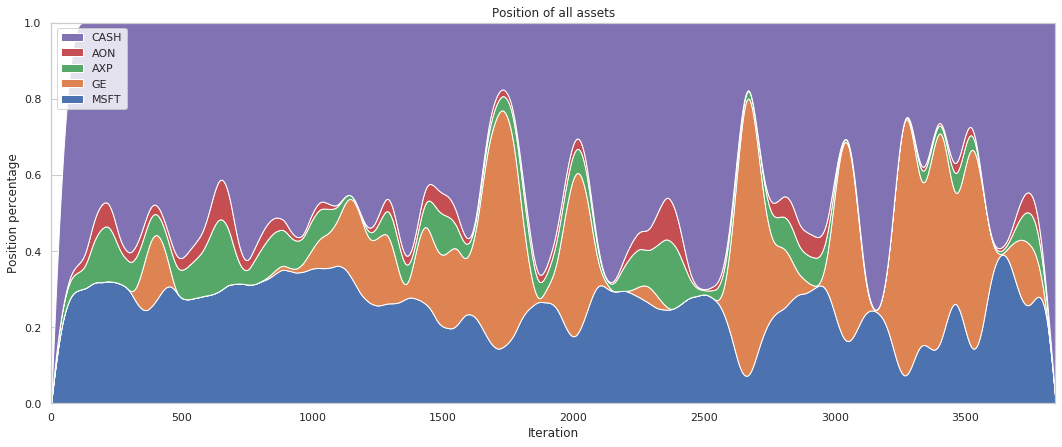

,Sharpe ratio
MSFT,2.464
GE,-0.148957
AXP,1.49773
AON,3.04028
SPY,2.04757
returns,0.689447


In [26]:
EPISODE = 10

plot_results(EPISODE, 'training')
plot_results(EPISODE, 'testing')